## PR曲线绘制（matplotlib）
https://www.yuque.com/huangzhongqing/hre6tf/bz88ccq3px8bax5z#dKV7n
codebase: https://blog.csdn.net/weixin_42196948/article/details/123510535

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [12]:
n_classes = 23

# np.save("target_labels.npy",target_labels)
# np.save("total_output_prob.npy",self.total_output_prob)

y_test = np.load("/home/chongqinghuang/code/lmv/target_labels.npy")
y_score = np.load("/home/chongqinghuang/code/lmv/total_output_prob.npy")
print(y_test.shape, y_score.shape)

(2963219, 23) (2963219, 23)


In [13]:
# 对三个分类以此计算precision、recall，并且运用micro方式对precision、recall求平均（也可以使用macro、weighted的方式进行求平均
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i],recall[i],_ = precision_recall_curve(y_test[:,i],y_score[:,i])
    average_precision[i] = average_precision_score(y_test[:,i],y_score[:,i])
    
precision["micro"],recall["micro"],_ = precision_recall_curve(y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(y_test,y_score,average="micro") 

/home/chongqinghuang/anaconda3/envs/pcdet/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/chongqinghuang/anaconda3/envs/pcdet/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/chongqinghuang/anaconda3/envs/pcdet/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/chongqinghuang/anaconda3/envs/pcdet/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/chongqinghuang/anaconda3/envs/pcdet/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:879: UserWarning: No positive class found in y_true, recall is set

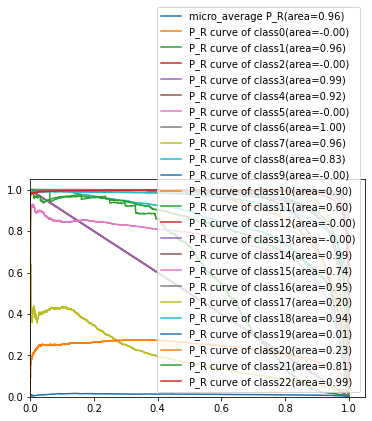

In [14]:
# 绘制P-R曲线
plt.clf()
plt.plot(recall["micro"],precision["micro"],label = "micro_average P_R(area={0:0.2f})".format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i],precision[i],label = "P_R curve of class{0}(area={1:0.2f})".format(i,average_precision[i]))
 
# plt.figure(figsize=(10, 6), dpi=230)
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.legend(loc = "lower right") # 带颜色备注
plt.show()